1. Project Introduction

This python project aims to achieve deep analysis of data collect from the Premier League, the top football league in England. The project will use a vast variety of data such as win/loss, xG, transfer window expenditure and home/away goals. Throughout the project I will create clear visualizations to provide evidence to my analysis and thoughts regarding the three following questions:

<> How much of an advantage/disadvantage does playing at home/away give?

<> Has scoring potential increased or decreased in the Premier League?

<> How much of an affect does spending in the transfer window have on team's scoring potential?

2. Getting Started

To begin the project relevant libraries are imported. Next the first dataset is assigned with an index column and then displayed. The Premier League consists of 380 matches a season, so we can check the data for the total number of matches. Lastly the data types in each columns are checked/converted to prevent any issues down the line.

In [29]:
# relevant installs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# assigning dataset
pl_data = pd.read_csv('C:/Projects/Adjusted Data For Python/Premier_League_2020-2021_Data.csv', index_col='Date')

# displaying first 5 rows in the dataset
pl_data.head(5)

,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Date,,,,,,,,,,,,,,,,,,,,,
9/12/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,...,2,6,12,12,2,3,2,2,0,0
9/12/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,...,3,5,14,11,7,3,2,1,0,0
9/12/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,...,6,3,9,6,9,0,1,0,0,0
9/12/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,...,3,2,13,7,8,7,2,2,0,0
9/13/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,A Taylor,...,1,7,12,9,2,5,1,1,0,0


In [30]:
# verifying all matches are included in the dataset
number_of_matches = pl_data['HomeTeam'].count()
print('Total number of matches in the dataset is', number_of_matches)

Total number of matches in the dataset is 380


In [31]:
# summary of values in the dataset
print(pl_data.info())

# converting index type from object to datetime
pl_data.index = pd.to_datetime(pl_data.index)

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 9/12/2020 to 5/23/2021
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null    int64 
 21  AR     

3. How much of an advantage/disadvantage does playing at home/away give?

To get a rough inital idea of the situation, the average number of goals scored in the 20/21 season was calculated first. Lying at close to three goals a game. From there a 'step' histogram was plotted to see a distribution of both home and away goals over the 380 matches played in the 20/21 season. To achieve this, the 'full time home goals' column and the 'full time away goals' were plotted individually with different colours using the Matplotlib library. It is unclear from this alone whether there was any advantage/disadvantage, but there was a slightly higher number of away goals over 2 goals in a single match compared to home goals.

In [32]:
# counting the number of goals in the season and finding the avg 
total_goals_scored = pl_data['FTHG'].sum() + pl_data['FTAG'].sum()
print('The total number of goals scored in the 20/21 season was', total_goals_scored)
mean_goals_scored = total_goals_scored/number_of_matches
print('The average number of goals scored in a match was is', mean_goals_scored)

The total number of goals scored in the 20/21 season was 1024
The average number of goals scored in a match was is 2.694736842105263


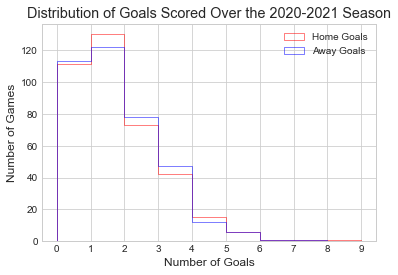

In [33]:
# looking at the distribution of goals scored over the season using a step histogram
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots()
ax.hist(pl_data['FTHG'], label='Home Goals', bins=[0,1,2,3,4,5,6,7,8,9], histtype='step', color='red')
ax.hist(pl_data['FTAG'], label='Away Goals', bins=[0,1,2,3,4,5,6,7,8,9], histtype='step', color='blue')
plt.xticks(np.arange(min(pl_data['FTHG']), max(pl_data['FTHG'])+1, 1.0))
ax.set_xlabel('Number of Goals')
ax.set_ylabel('Number of Games')
ax.set_title('Distribution of Goals Scored Over the 2020-2021 Season')
ax.legend()
plt.show()

Next, team's individual data was analyzed. Starting with the team 'Manchester United' the cumulative sum of both the 'full time home goals' column and the 'full time away goals' column was calculated and assigned. After which the two cumulative sums was plotted against the datetime index column to produce a time series plot using the Matplot library. From the plot, Manchester United shows a weak performance at home during the start of the season, unable to score goals, but improved significantly at the beginning of the new year. (The large increase observed in February is due to a 9-0 match against Southampton)

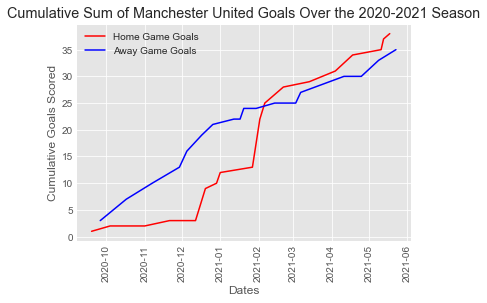

In [34]:
# comparing Man United's HGs against AGs using a time series graph
MU_home_games = pl_data[pl_data['HomeTeam'] == 'Man United']
MU_home_games.head()    
MU_away_games = pl_data[pl_data['AwayTeam'] == 'Man United']
MU_away_games.head()
MU_cum_hg = np.cumsum(MU_home_games['FTHG'])
MU_cum_ag = np.cumsum(MU_away_games['FTAG'])
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.plot(MU_home_games.index, MU_cum_hg, label = 'Home Game Goals', color='red')
ax.plot(MU_away_games.index, MU_cum_ag, label = 'Away Game Goals', color='blue')
plt.xticks(rotation=90)
ax.set_xlabel('Dates')
ax.set_ylabel('Cumulative Goals Scored')
ax.set_title('Cumulative Sum of Manchester United Goals Over the 2020-2021 Season')
ax.legend()
plt.show()

Lastly a function was defined using the method in which the inital plot was made. By doing this, using the new function, any team's cumulative sum over the 20/21 season can be visualized with just a single line of code. Fulham appeared to favour away games, scoring almost double their home goals total. Whereas Everton seemed consistent both home and away.

In [35]:
# defining a function which compares a team's HGs against AGs
def home_against_away_goals(team):
    home_games = pl_data[pl_data['HomeTeam'] == team]  
    away_games = pl_data[pl_data['AwayTeam'] == team]
    cum_hg = np.cumsum(home_games['FTHG'])
    cum_ag = np.cumsum(away_games['FTAG'])
    fig, ax = plt.subplots()
    ax.plot(home_games.index, cum_hg, label = 'Home Game Goals', color='red')
    ax.plot(away_games.index, cum_ag, label = 'Away Game Goals', color='blue')
    plt.xticks(rotation=90)
    ax.set_xlabel('Dates')
    ax.set_ylabel('Cumulative Goals Scored')
    ax.set_title('Cumulative Sum of ' + team + ' Goals Over the 2020-2021 Season')
    ax.legend()
    plt.show()

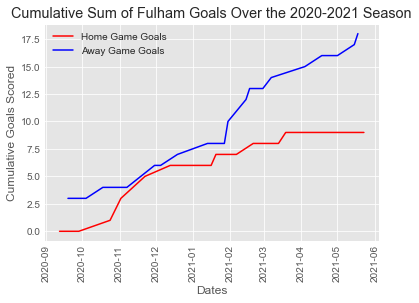

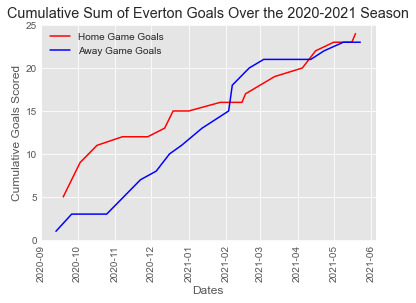

In [36]:
# using created function to observe other teams with one line of code
home_against_away_goals('Fulham')
home_against_away_goals('Everton')

4. Has scoring potential increased or decreased in the Premier League?

As the inital dataset did not contain xG, they needed to be collected and assigned afterwards.

'xG' is also referred to as 'expected goals', it is a statistical calculation which calculates the probability that a shot will result in a goal based on the characteristics of that shot and the events leading up to it. There are many variables which affect the calculation such as location of shooter, body part used, the type of pass that lead up to the shot and the type of attack.

As the data came in 4 seperate csv files, the data needed to be merged into a single dataset. To do this, the important data was selected and then were merged in pairs to add suffixes containing the season dates using the inner join technique. Followed by repeating for the two new datasets where adding suffixes was no longer required to give a single dataset.

In [37]:
# assigning new datasets containing xG data
xG_20_21data = pd.read_csv('C:/Projects/Adjusted Data For Python/Premier_League_data_with_xG_2020-2021.csv')
xG_19_20data = pd.read_csv('C:/Projects/Adjusted Data For Python/Premier_League_data_with_xG_2019-2020.csv')
xG_18_19data = pd.read_csv('C:/Projects/Adjusted Data For Python/Premier_League_data_with_xG_2018-2019.csv')
xG_17_18data = pd.read_csv('C:/Projects/Adjusted Data For Python/Premier_League_data_with_xG_2017-2018.csv')

In [38]:
# creating a new datasets which only include team name and xG
xG_17_18_short = xG_17_18data[['Squad', 'xG']]
xG_18_19_short = xG_18_19data[['Squad', 'xG']]
xG_19_20_short = xG_19_20data[['Squad', 'xG']]
xG_20_21_short = xG_20_21data[['Squad', 'xG']]

In [39]:
# using an inner join to join all 4 of the new datasets into 1
xG_17_19_short = xG_17_18_short.merge(xG_18_19_short, on = 'Squad', suffixes = ('_17_18', '_18_19'))
xG_19_21_short = xG_19_20_short.merge(xG_20_21_short, on = 'Squad', suffixes = ('_19_20', '_20_21'))
xG_17_21_short = xG_17_19_short.merge(xG_19_21_short, on = 'Squad')

In [40]:
# displaying first 5 rows in the new dataset
xG_17_21_short.head(5)

,Squad,xG_17_18,xG_18_19,xG_19_20,xG_20_21
0,Manchester City,86.4,82.0,93.0,73.3
1,Manchester Utd,60.7,59.4,59.4,60.2
2,Tottenham,67.3,57.9,46.1,54.5
3,Liverpool,72.7,74.7,71.5,72.6
4,Chelsea,57.9,58.2,66.6,64.0


Next, with the new dataset, a boxplot was plotted using the Matplotlib library. Below, the blue lines represents the median 'xG' in each Premier League season. The box represents the inter-quartile range between the 25th and the 75th percentiles, so where 50% of the 'xG' data lies for each season. The whiskers show 1.5 times the size of the inter-quartile range beyond the 25th and the 75th percentiles. Lastly any circles outside of these are clear outliers. 

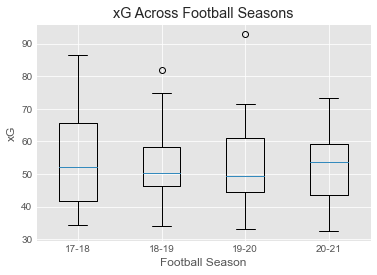

In [41]:
# comparing xG between seasons to vizualize action
fig, ax = plt.subplots()
ax.boxplot([xG_17_21_short['xG_17_18'], xG_17_21_short['xG_18_19'], xG_17_21_short['xG_19_20'], xG_17_21_short['xG_20_21']]) 
ax.set_xticklabels(['17-18', '18-19', '19-20', '20-21'])
ax.set_xlabel('Football Season')
ax.set_ylabel('xG')
ax.set_title('xG Across Football Seasons')
plt.show()

Curious about the outlier in the 19/20 season, the maximum 'xG' value for that season was found. Followed by printing a list of columns containing the team's information for that season. Manchester City is shown to have had an extremely strong showing in the 19/20 season, winning the Premier League with 'xG' data showing 93 goals were expected across the season. In actual fact, Manchester City exceeded their expected goals, scoring a total of 102 goals in the 19/20 season shown in the 'GF' column below. 

In [42]:
# displaying the data of the outlying team in the 19/20 season
xG_17_21_short['xG_19_20'].max()
print(xG_19_20data[['Squad', 'W', 'D', 'L', 'GF', 'GA', 'xG']][xG_19_20data['xG'] == 93.0])

             Squad   W  D  L   GF  GA    xG
1  Manchester City  26  3  9  102  35  93.0


5. How much of an affect does spending in the transfer window have on team's scoring potential?

For this question, expenditure during transfer windows for each team was required so that it could be compared with the 'xG' dataset. After assigning the dataset, the 'club' column name required changing to 'squad' to match the xG dataset in order to merge the two datasets on that column. The expenditure dataset also had more teams than the xG dataset. Therefore a left join was used on the xG dataset to remove the extra teams, otherwise the following plot would not work.

In [43]:
# assigning new dataset containing total transfer window expenditure between 2014-2015 and 2020-2021
Expenditure_14_21 = pd.read_csv('C:/Projects/Adjusted Data For Python/ExpenditureEurosPL14-15_20-21.csv')

In [44]:
# displaying first 5 rows in the new dataset
Expenditure_14_21.head()

,Club,Expenditure_in_Billion,Arrivals,Income,Departures,Balance
0,Manchester City,1.24000,174,â‚¬414.91m,170,â‚¬-828.49m
1,Manchester Utd,1.14000,107,â‚¬370.85m,107,â‚¬-765.20m
2,Chelsea,1.13000,240,â‚¬833.12m,231,â‚¬-295.38m
3,Liverpool,0.80696,136,â‚¬562.72m,128,â‚¬-244.24m
4,Arsenal,0.73792,109,â‚¬280.55m,114,â‚¬-457.37m


In [45]:
# summary of values in the dataset
Expenditure_14_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Club                    25 non-null     object 
 1   Expenditure_in_Billion  25 non-null     float64
 2   Arrivals                25 non-null     int64  
 3   Income                  25 non-null     object 
 4   Departures              25 non-null     int64  
 5   Balance                 25 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ KB


In [46]:
# in order to create a scatter plot using the expenditure dataset and an xG dataset without throwing an error, 
# the number of rows need to be equal, the expenditure dataset contains more teams so a left join on the xG dataset is required
Expenditure_14_21 = Expenditure_14_21.rename(columns={'Club': 'Squad'})
Expenditure_14_21.head()
Exp_and_xG = xG_20_21data.merge(Expenditure_14_21, on = 'Squad')
Exp_and_xG[['xG', 'Expenditure_in_Billion']].count()

xG                        20
Expenditure_in_Billion    20
dtype: int64

In [47]:
# creating list for teams for scatter plot legend
t = ['Manchester City', 'Manchester Utd', 'Liverpool', 'Chelsea',
'Leicester City', 'West Ham', 'Tottenham', 'Arsenal', 'Leeds United',
'Everton', 'Aston Villa', 'Newcastle Utd', 'Wolves', 'Crystal Palace',
'Southampton', 'Brighton', 'Burnley', 'Fulham', 'West Brom', 'Sheffield Utd']

Using a scatter plot in Seaborn library, the expenditure in transfer windows from 2014 until 2020 was plotted against the xG season total for each team. There was a clear positive correlation between expenditure and xG, as one would expect. However there were some outliers which posted high xG season totals, matching some teams that had spent several hundred of million euros more over the previous 6 years. With the 'green' outlier being Leeds United finishing the season in 8th with an season total xG of 57.5 after €0.17bn spent. And the 'orange' outlier being Liverpool finishing the season in 2nd with an season total xG of 72.6 after €0.81bn spent.

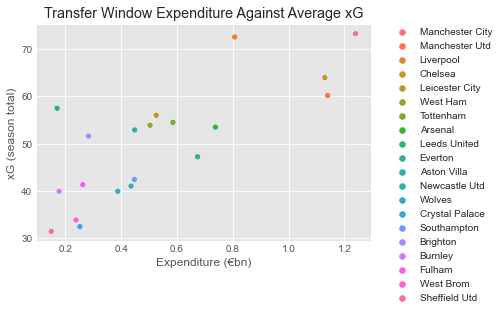

In [48]:
# comparing 7 years of expenditure to the xG average in the 2020-2021 season for all teams using a scatter plot
ax = sns.scatterplot(x=Exp_and_xG['Expenditure_in_Billion'], y=Exp_and_xG['xG'], hue=t)
ax.set_xlabel('Expenditure (€bn)')
ax.set_ylabel('xG (season total)')
ax.set_title('Transfer Window Expenditure Against Average xG')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [49]:
print(Exp_and_xG[['Squad', 'xG', 'Expenditure_in_Billion']][Exp_and_xG['Squad'] == 'Leeds United'])
print(Exp_and_xG[['Squad', 'xG', 'Expenditure_in_Billion']][Exp_and_xG['Squad'] == 'Liverpool'])

          Squad    xG  Expenditure_in_Billion
8  Leeds United  57.5                 0.17029
       Squad    xG  Expenditure_in_Billion
2  Liverpool  72.6                 0.80696
